# Frequency Analysis 101

In this exercise, you are tasked with:

* Conducting initial processing of the given texts by breaking them down into tokens.
* Executing a frequency analysis on the processed data and interpreting the results.

## Import data

Documentation: http://www.nltk.org/book_1ed/ch02.html

Import data from NLTK.
You can use Gutenberg dataset:

In [1]:
import nltk
nltk.download('gutenberg')
from nltk.corpus import gutenberg

[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Unzipping corpora/gutenberg.zip.


In [6]:
ids = gutenberg.fileids()
print(len(ids))

for fileid in ids:
    print(f"[FILE] {fileid}")
    print(gutenberg.raw(fileid)[:50])

18
[FILE] austen-emma.txt
[Emma by Jane Austen 1816]

VOLUME I

CHAPTER I



[FILE] austen-persuasion.txt
[Persuasion by Jane Austen 1818]


Chapter 1


Sir
[FILE] austen-sense.txt
[Sense and Sensibility by Jane Austen 1811]

CHAPT
[FILE] bible-kjv.txt
[The King James Bible]

The Old Testament of the K
[FILE] blake-poems.txt
[Poems by William Blake 1789]

 
SONGS OF INNOCENC
[FILE] bryant-stories.txt
[Stories to Tell to Children by Sara Cone Bryant 1
[FILE] burgess-busterbrown.txt
[The Adventures of Buster Bear by Thornton W. Burg
[FILE] carroll-alice.txt
[Alice's Adventures in Wonderland by Lewis Carroll
[FILE] chesterton-ball.txt
[The Ball and The Cross by G.K. Chesterton 1909]


[FILE] chesterton-brown.txt
[The Wisdom of Father Brown by G. K. Chesterton 19
[FILE] chesterton-thursday.txt
[The Man Who Was Thursday by G. K. Chesterton 1908
[FILE] edgeworth-parents.txt
[The Parent's Assistant, by Maria Edgeworth]



[FILE] melville-moby_dick.txt
[Moby Dick by Herman Melville 1851]


ETY

## Use NLTK's FreqDist functionality

Use the `FreqDist` functionality as shown in https://www.nltk.org/book/ch01.html and http://www.nltk.org/book_1ed/ch02.html.

Use the FreqDist class by passing your list of tokens to it. This will create an object containing the frequency distribution of all tokens within your text, which you can then analyze.

In [ ]:
# Load a specific text
tokens = gutenberg.words('austen-emma.txt')

# Print out most frequent 50 words with their counts. 
# You need to use most_common(number_of_words) method applied to fdist1

[(',', 11454), ('.', 6928), ('to', 5183), ('the', 4844), ('and', 4672), ('of', 4279), ('I', 3178), ('a', 3004), ('was', 2385), ('her', 2381), (';', 2199), ('it', 2128), ('in', 2118), ('not', 2101), ('"', 2004), ('be', 1970), ('she', 1778), ('that', 1730), ('you', 1677), ('had', 1606)]


What can you tell about the most frequent words in this text?

---



Let's try visualising cumulative frequency of the most frequent $30$ words:

In [ ]:
import matplotlib.pyplot as plt

# You need to use plot(number_of_words, cumulative=True) method applied to fdist1

What does this plot suggest?

## FreqDist from scratch

Follow these steps:
- Collect words
- calculate their frequency
- return a dictionary sorted in the reverse order

In [14]:
import operator

# update the count for a_word in word_map by 1. 
# word_map.get(a_word) returns the current count,
# word_map.get(a_word, 0) allows you to cover cases where current word count is 0 

def collect_word_map(word_list):
    word_map = {}
    for a_word in word_list:
        word_map[a_word] = # FIXME
    return word_map

# Let's sort the word frequency map by word counts,
# starting from the largest count (reverse order),
# and print up to 10 most frequent words
word_map = collect_word_map(gutenberg.words("austen-emma.txt"))
sorted_map = (sorted(word_map.items(), key=operator.itemgetter(1)))[::-1]
print(sorted_map[:10])

[(',', 11454), ('.', 6928), ('to', 5183), ('the', 4844), ('and', 4672), ('of', 4279), ('I', 3178), ('a', 3004), ('was', 2385), ('her', 2381)]


Let's calculate the percentage of the content covered by specific (most frequent) words. E.g., what percentage of words used in text are commas?

In [15]:
# Sort the word frequency map by word counts, starting from the largest count (reverse order)

def collect_percentage_map(word_map, up_to):
    total_count = sum(word_map.values())
    sorted_map = # FIXME
    percentage_map = [(item[0], 100*float(item[1])/float(total_count)) for item in sorted_map[:up_to]]
    return percentage_map

print(collect_percentage_map(word_map, 50))

[(',', 5.952387139018953), ('.', 3.60032635752779), ('to', 2.6934889594495575), ('the', 2.5173182557541303), ('and', 2.4279337099263616), ('of', 2.2237004162617513), ('I', 1.6515353874456287), ('a', 1.5611114864338165), ('was', 1.2394310569722544), ('her', 1.2373523466041667), (';', 1.1427710248561793), ('it', 1.1058739158226236), ('in', 1.1006771399024045), ('not', 1.091842620838032), ('"', 1.0414338944119068), ('be', 1.0237648562831618), ('she', 0.9239867586149553), ('that', 0.8990422341979036), ('you', 0.8714993218207424), ('had', 0.8346022127871868), ('as', 0.7207928201343886), ('--', 0.718194432174279), ('he', 0.7093599131099066), ('for', 0.6864940990609426), ('have', 0.6761005472205044), ('is', 0.6340066622667297), ('with', 0.6168573017300067), ('Mr', 0.5991882636012618), ('very', 0.5981489084172179), ('but', 0.5965898756411522), ('."', 0.5913930997209331), ('his', 0.5654092201198376), ("'", 0.523315335166063), ('at', 0.5181185592458438), ('s', 0.4848591933564417), ('so', 0.48018

Visualise the cumulative frequency counts as a histogram:

Total cumulative coverage = 50.05%


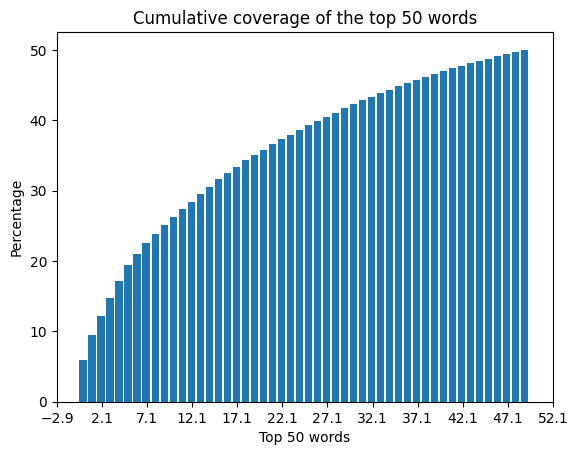

In [17]:
import numpy as np
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
%matplotlib inline

def visualise_dist(word_map, up_to):
    width = 10.0
    percentage_map = collect_percentage_map(word_map, up_to)
    sort_map = {}
    rank = 0
    cum_sum = 0
    # Store cumulative percetage of coverage
    for item in percentage_map:
        rank += 1
        cum_sum += item[1]
        sort_map[rank] = cum_sum
    # How much do the top n words account for?
    print("Total cumulative coverage = %.2f" % cum_sum + "%")

    fig, ax = plt.subplots()
    plt.title("Cumulative coverage of the top " + str(up_to) + " words")
    plt.ylabel("Percentage")
    plt.xlabel("Top " + str(up_to) + " words")
    # Build the histogram for the percentages
    plt.bar(range(len(sort_map)), sort_map.values())
    # Label x axis with the ranks of the 1st to n-th most frequent word
    # printing out each 5-th label on the axis
    start, end = ax.get_xlim()
    ax.xaxis.set_ticks(np.arange(start, end+1, 5))
    plt.show()

# Explore statistics with a different number of top n words
visualise_dist(word_map, 50)

What does this cumulative distribution suggest?